# UMI Cutoff PCA Similarity

In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb, Seurat
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.cell_selection import cellranger_counts, filter_gene_counts_by_barcode

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-25_umi_cutoff_pca_similarity')

last updated: 2018-03-26 
Git hash: 0e78dce8413b08a6852759bfce844a9f30437ed8


In [5]:
mpl.style.use(['common', 'talk'])

In [6]:
umi2 = pd.read_parquet('../output/testis2/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw2 = cellranger_counts('../output/testis2/outs/raw_gene_bc_matrices_h5.h5')

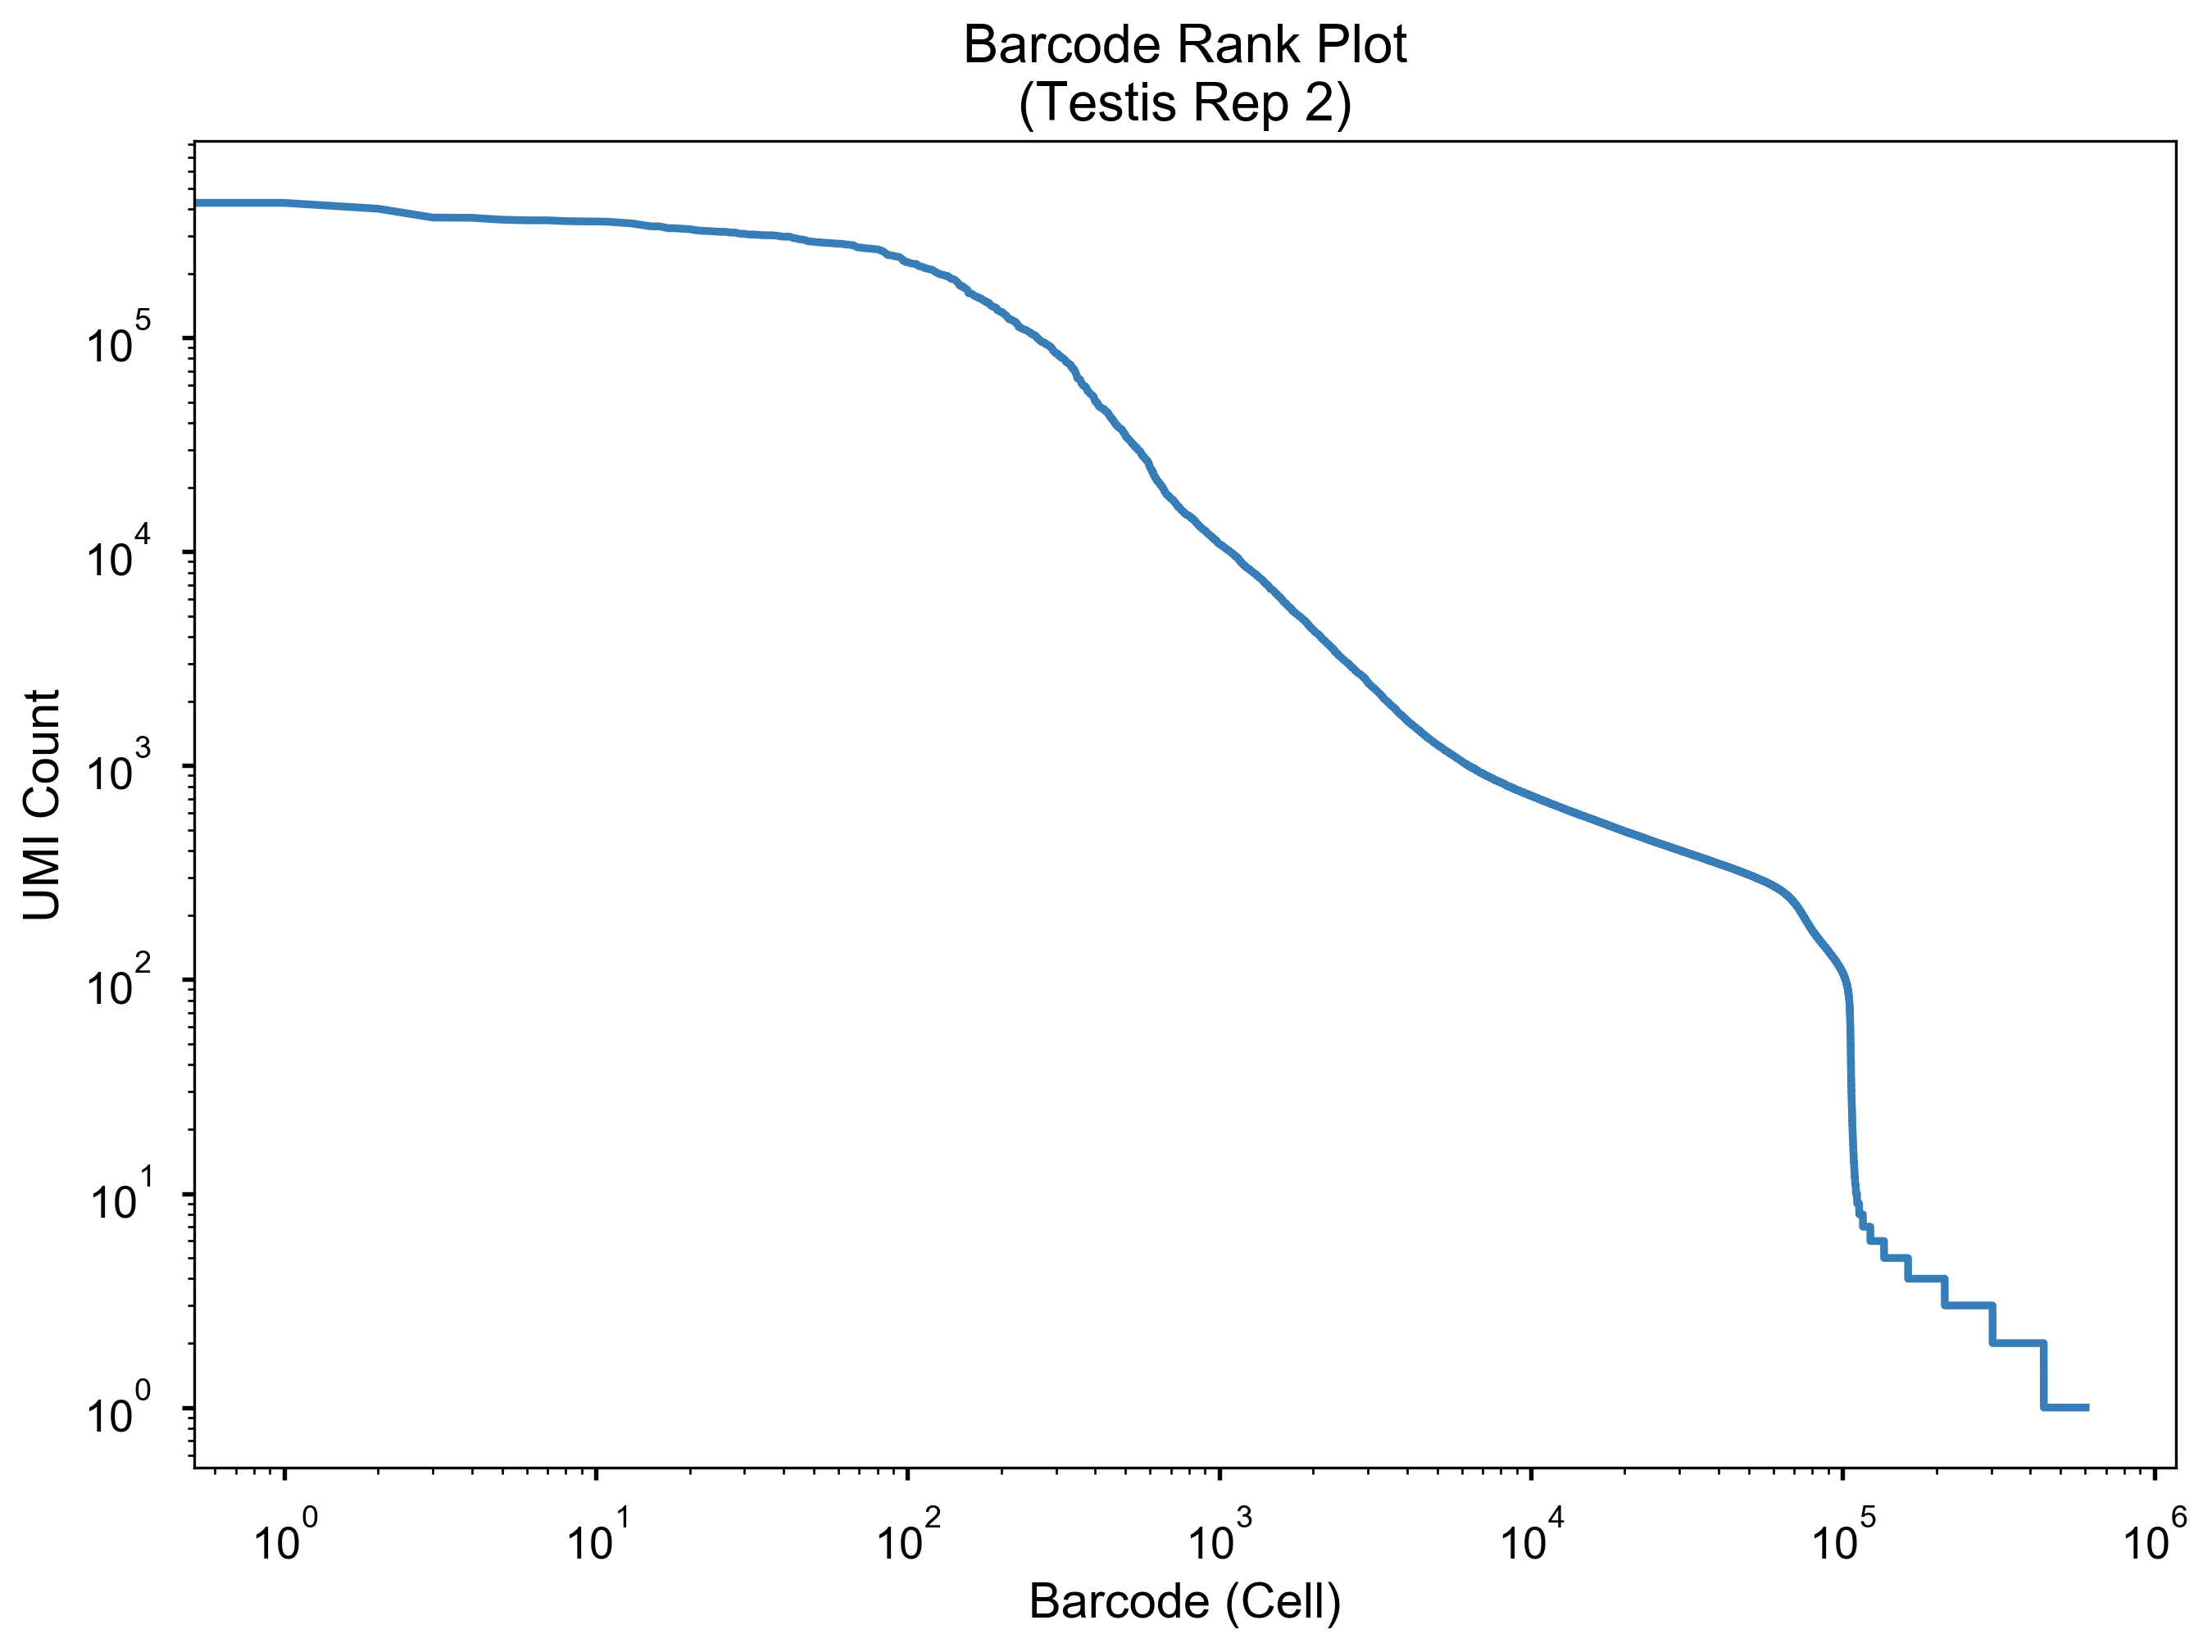

In [12]:
Y = umi2.umi_count.values
X = np.arange(umi2.shape[0])
fig, ax = plt.subplots(1, 1)
ax.plot(X, Y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Barcode Rank Plot\n(Testis Rep 2)")
ax.set_xlabel('Barcode (Cell)')
ax.set_ylabel('UMI Count');

In [13]:
der2 = np.diff(Y, n=2)
loc = np.where(der2 == 0)[0][0]

Text(561,40155,'Inflection Point (d^2 = 0)')

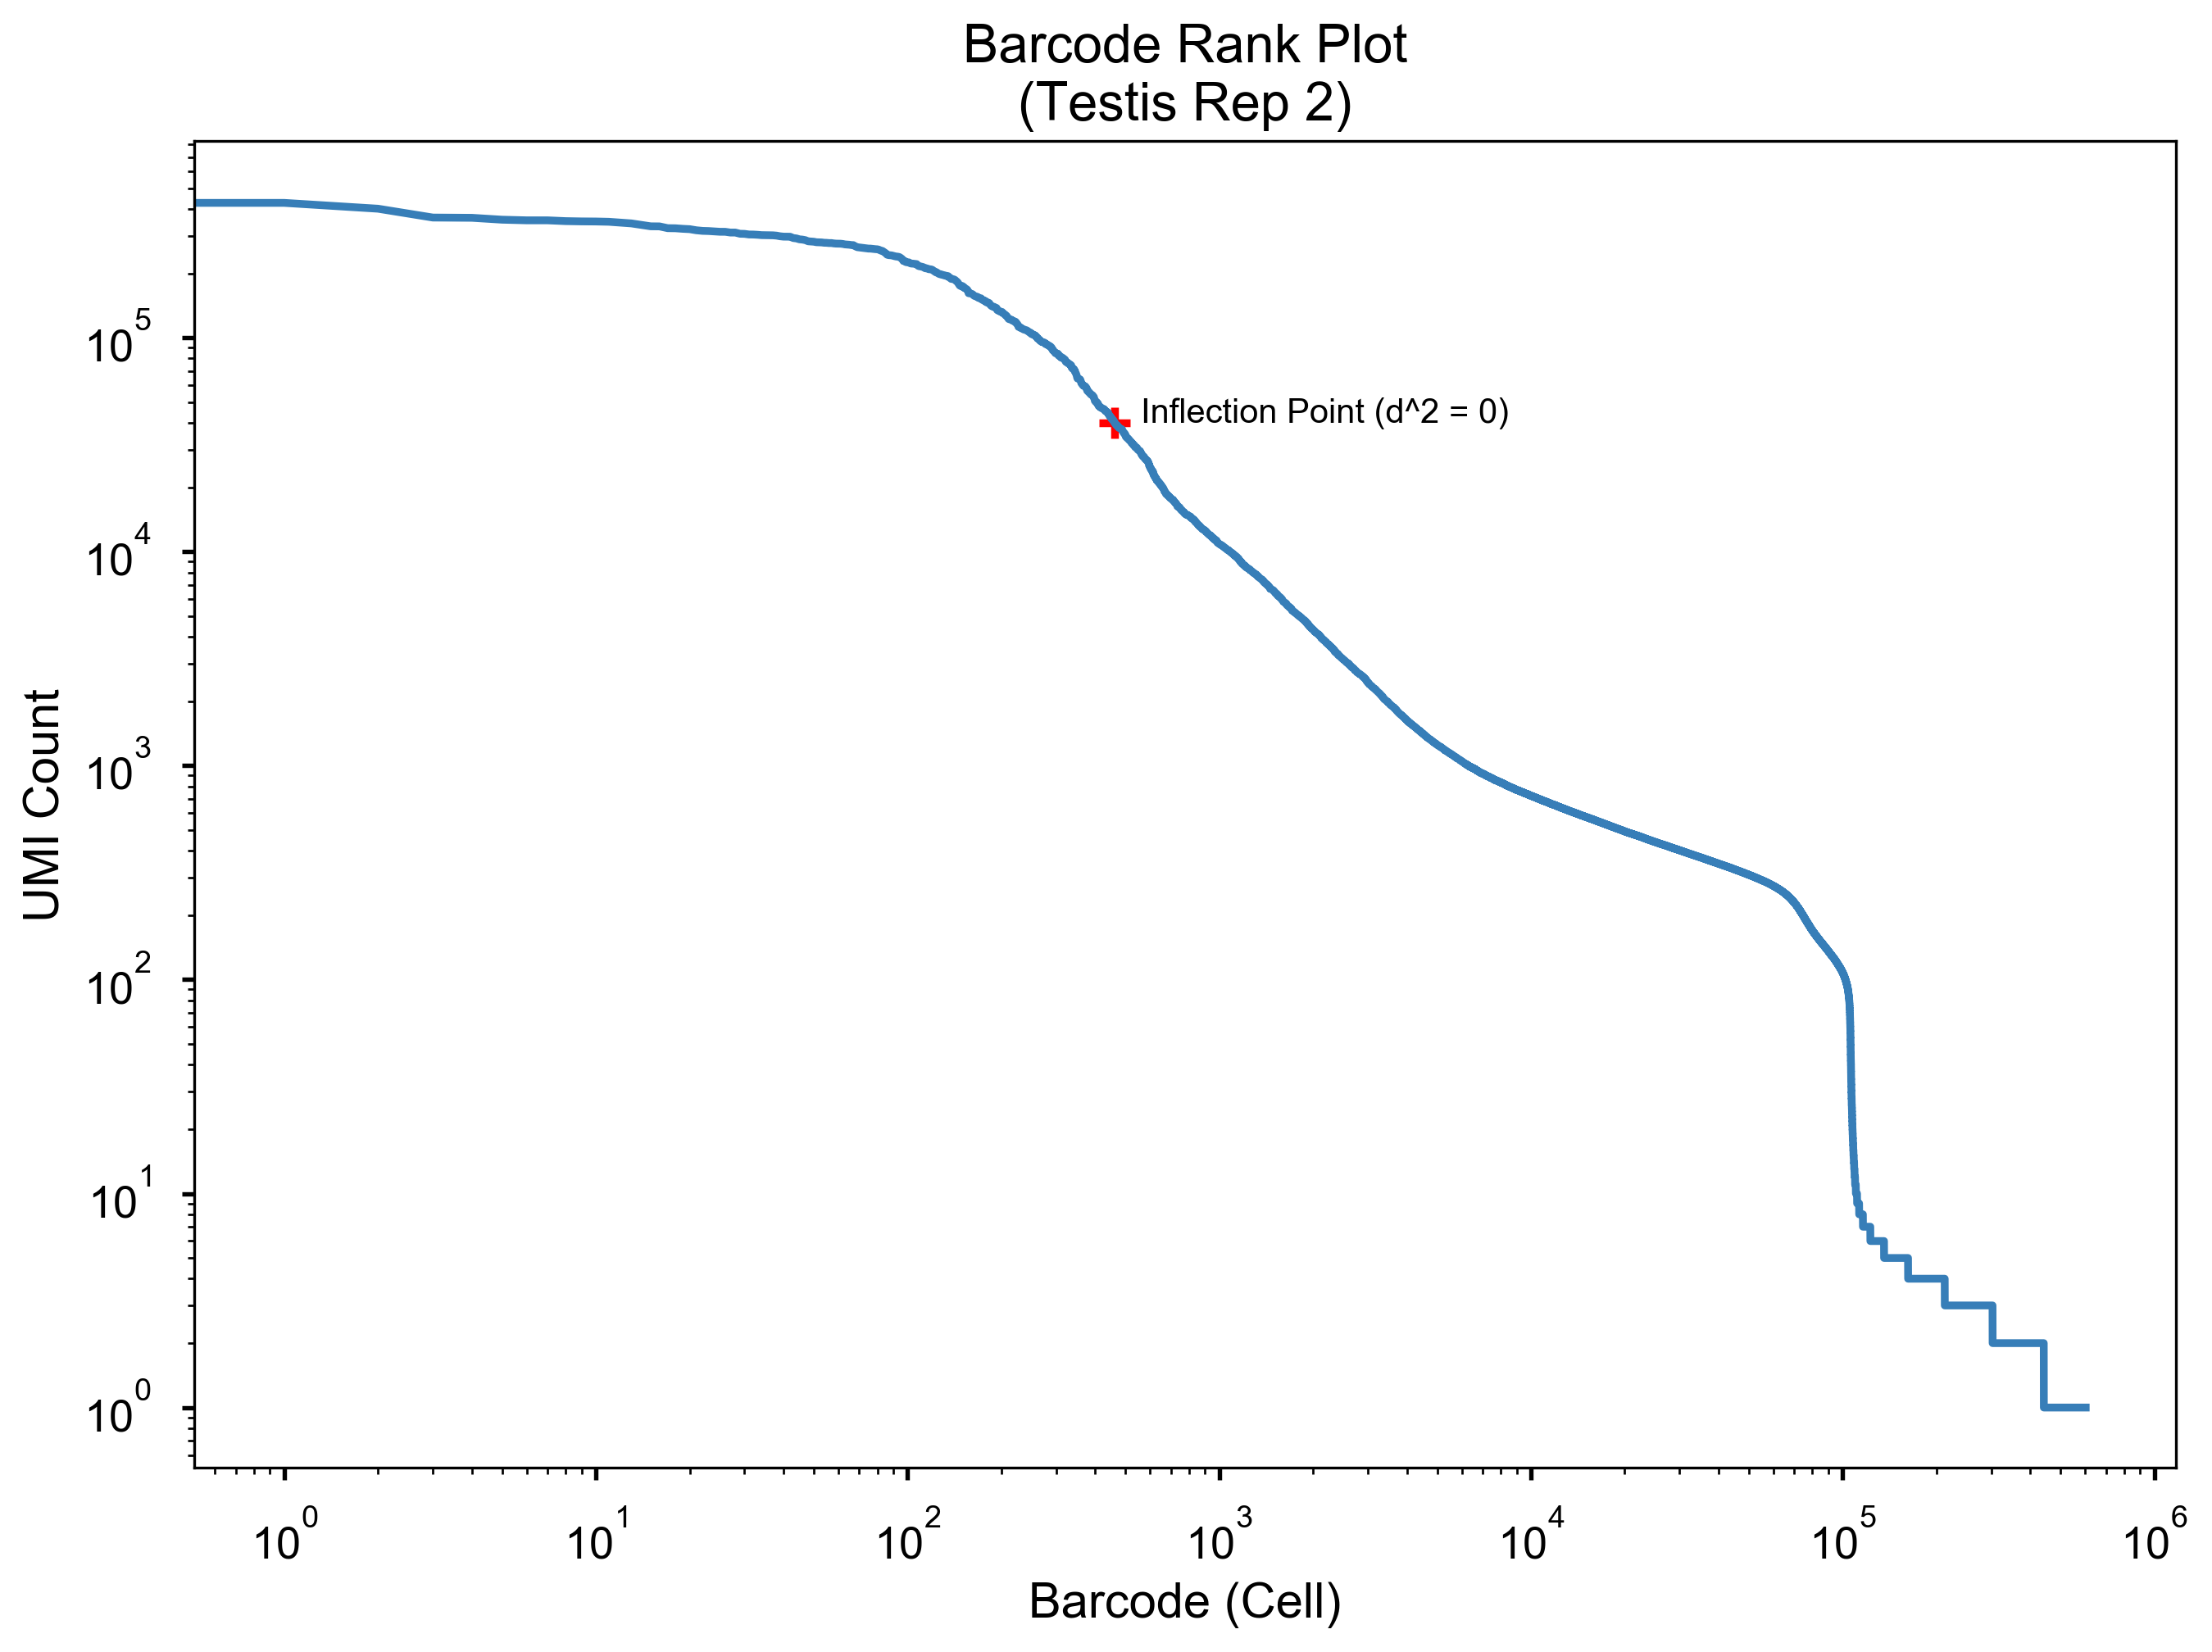

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(umi2.shape[0]), umi2.umi_count.values)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Barcode Rank Plot\n(Testis Rep 2)")
ax.set_xlabel('Barcode (Cell)')
ax.set_ylabel('UMI Count');
ax.scatter(X[loc], Y[loc], marker='+', color='r')
ax.annotate(xy=(X[loc], Y[loc]), s='Inflection Point (d^2 = 0)', xytext=(X[loc] + 100, Y[loc] + 100))

In [18]:
loc = 200

In [19]:
_d2 = filter_gene_counts_by_barcode(umi2.index[:loc], raw2)
X = _d2.T

# Run initial PCA
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
_d2_pca = PCA().fit(X_std)
_pcs = range(1, _d2_pca.components_.shape[0] + 1)

Text(0.5,1,'Scree Plot')

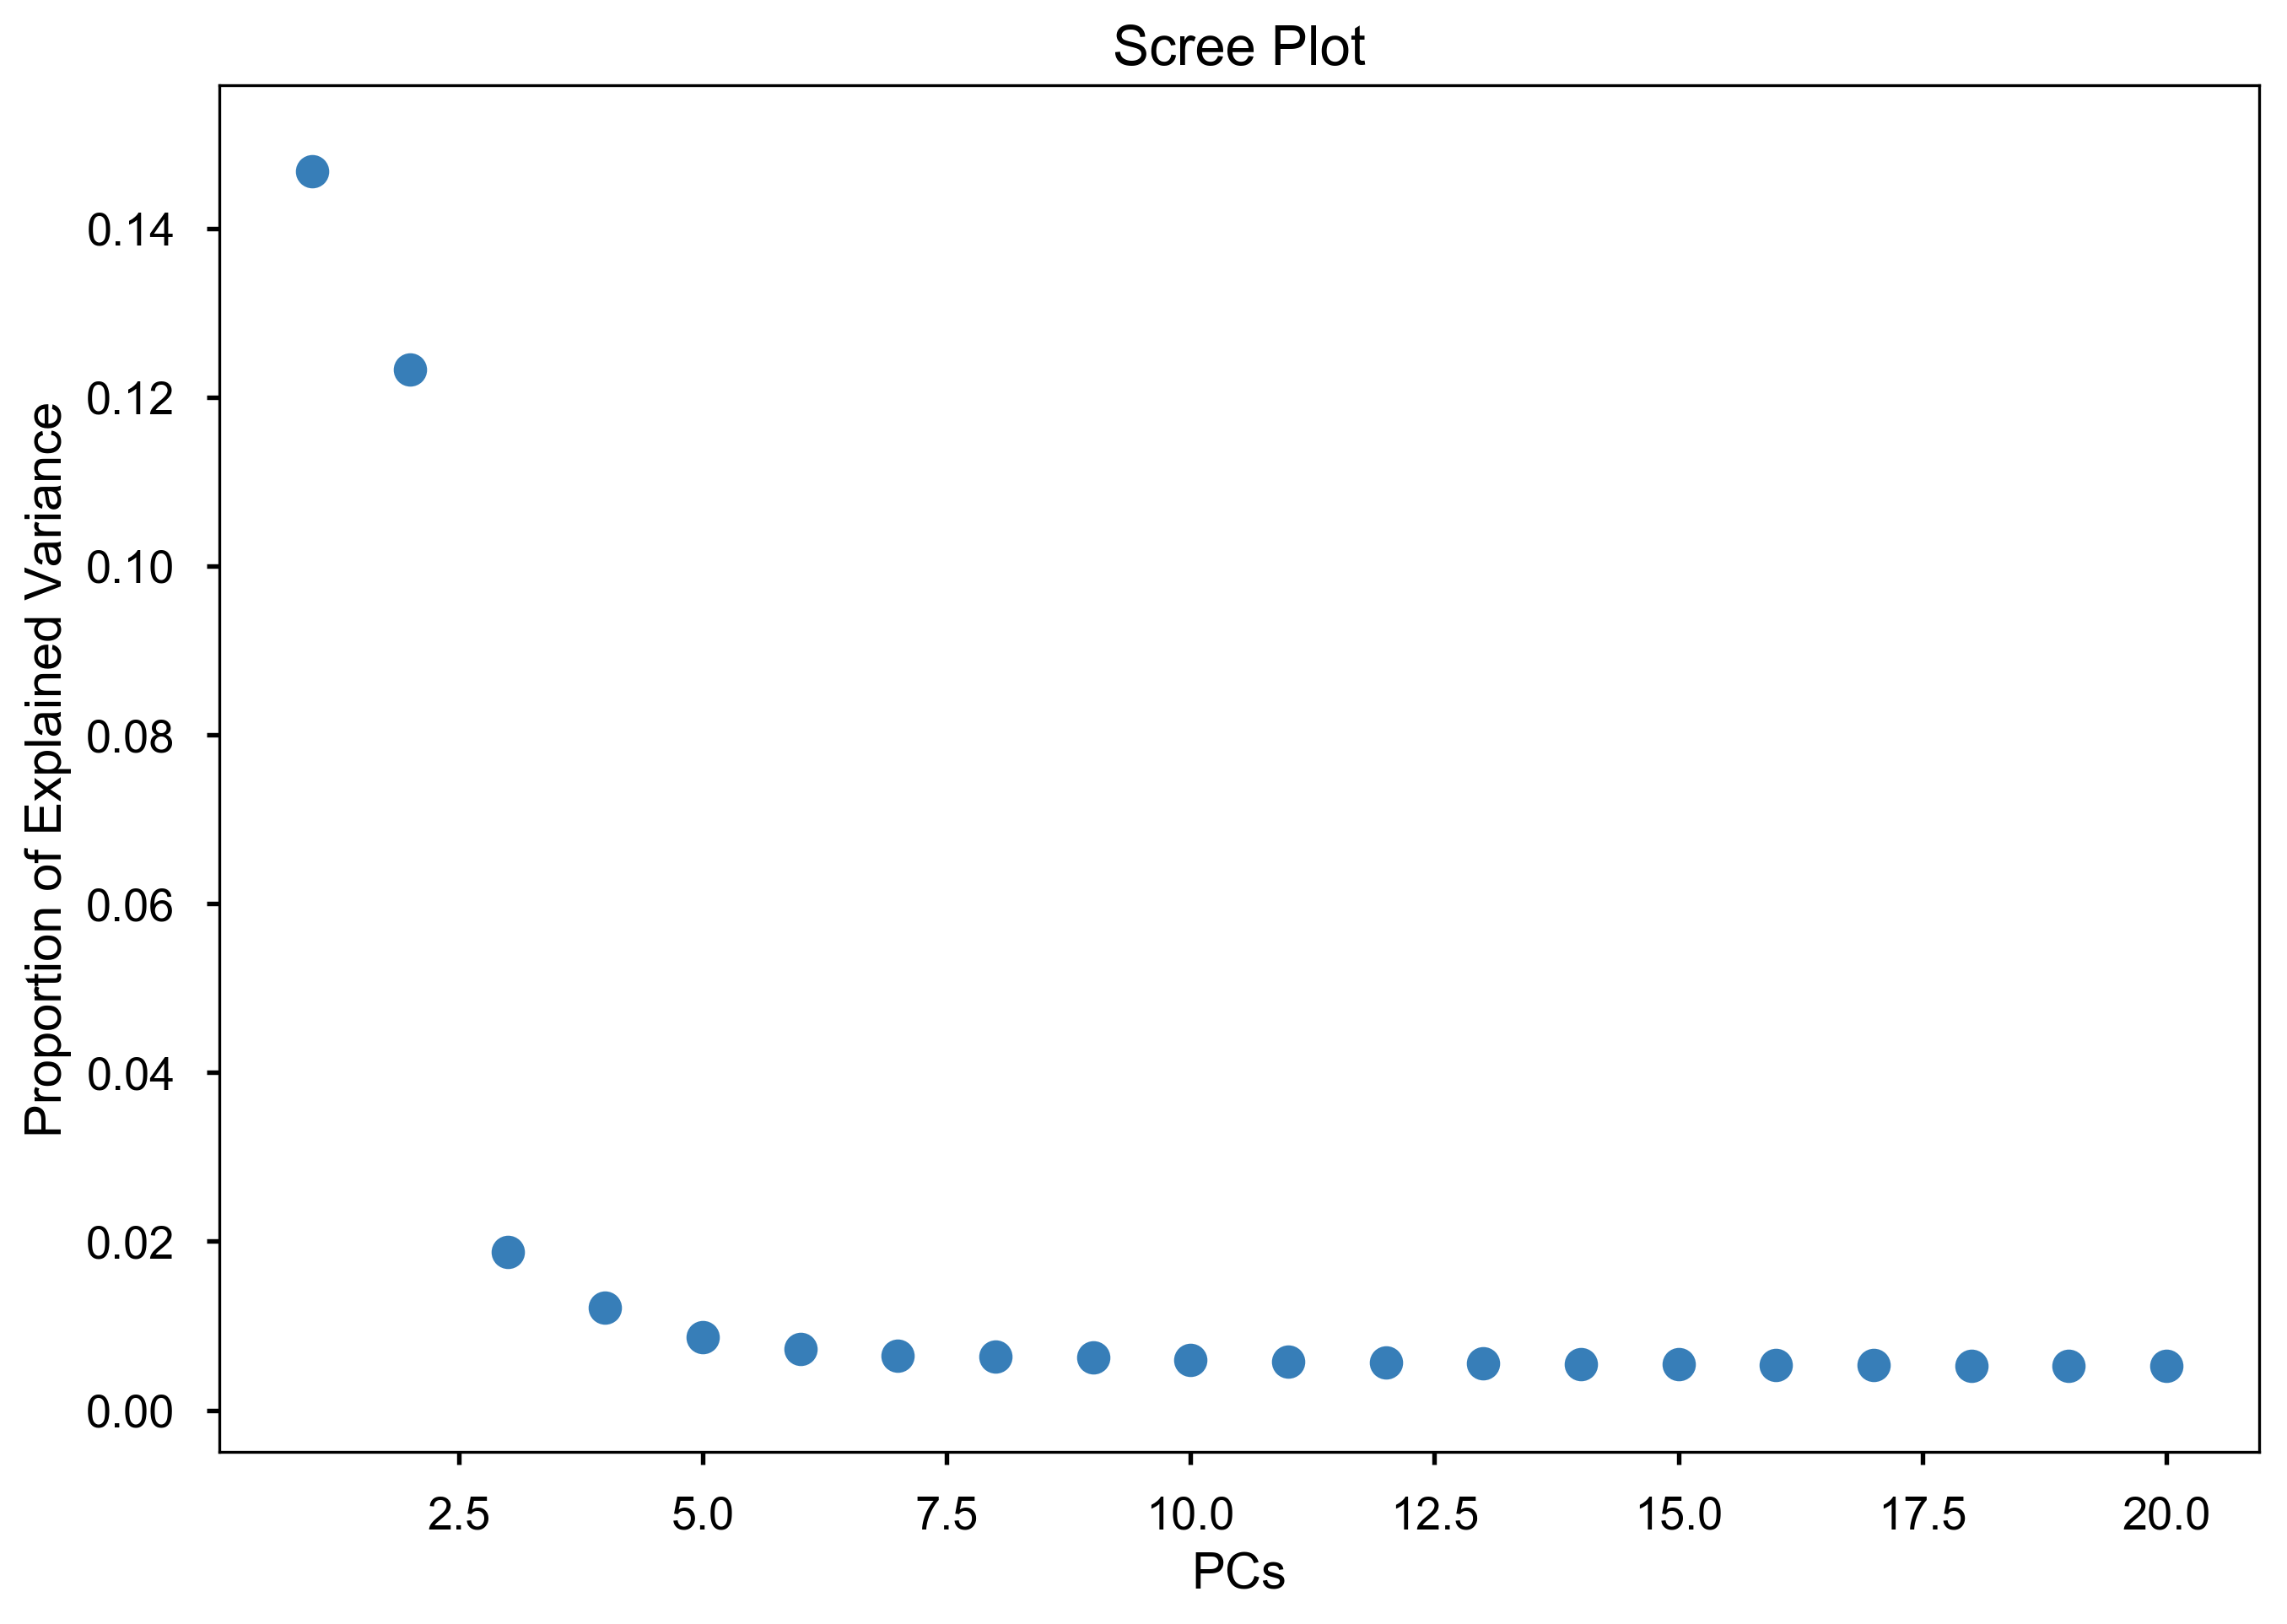

In [24]:
fig, ax = plt.subplots(1, 1)
ax.scatter(_pcs[:20], _d2_pca.explained_variance_ratio_[:20])
ax.set_xlabel('PCs')
ax.set_ylabel('Proportion of Explained Variance')
ax.set_title('Scree Plot')
#ax.set_xlim(-1, 100);

In [25]:
def calc_cosine(base, umi, raw, loc):
    _dat = filter_gene_counts_by_barcode(umi.index[:loc], raw)
    X = _dat.T
    scaler = StandardScaler().fit(X)
    X_std = scaler.transform(X)
    _pca = PCA(n_components=6).fit(X_std)
    return (
        cosine(base.components_[0, :], _pca.components_[0, :]), 
        cosine(base.components_[1, :], _pca.components_[1, :]),
        cosine(base.components_[2, :], _pca.components_[2, :]),
        cosine(base.components_[3, :], _pca.components_[3, :]),
        cosine(base.components_[4, :], _pca.components_[4, :]),
        cosine(base.components_[5, :], _pca.components_[5, :]),
    )

In [26]:
res2 = []
_interval = 100
_loc = loc + _interval
while _loc < 10000:
    res2.append((_loc, *calc_cosine(_d2_pca, umi2, raw2, _loc)))
    _loc += _interval

_dat = np.array(res2)

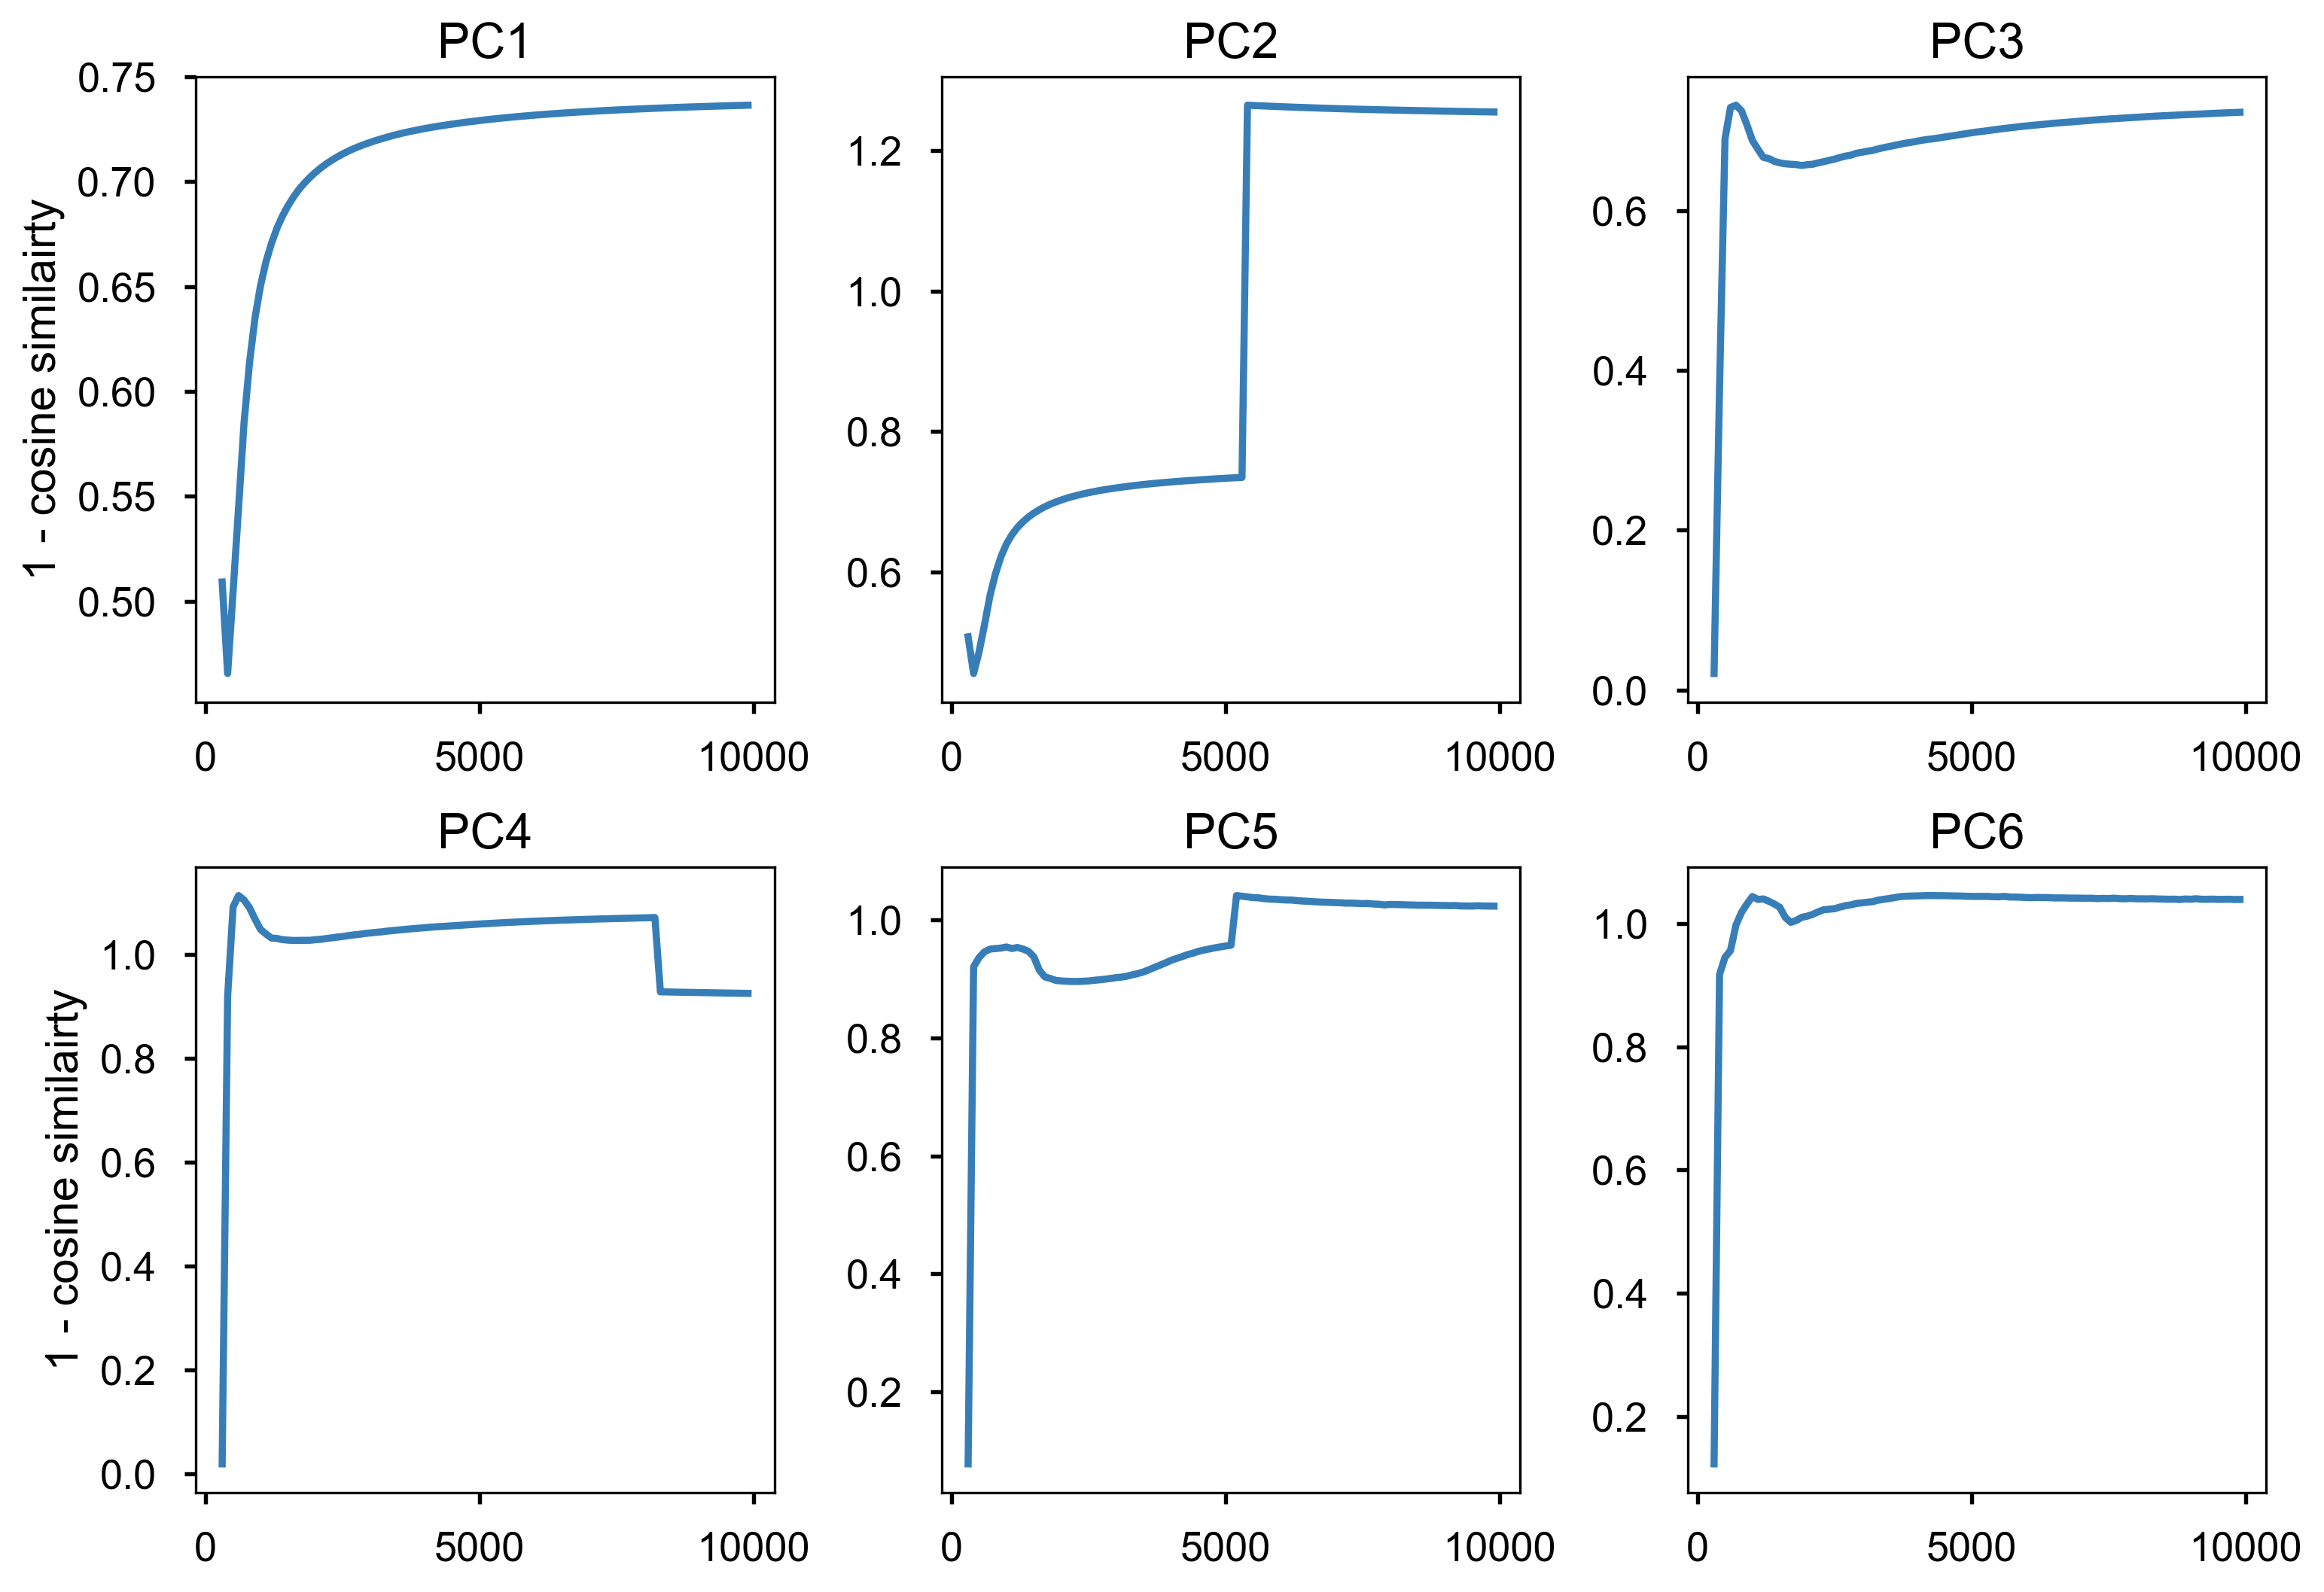

In [29]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

ax1.plot(_dat[:, 0], _dat[:, 1])
ax1.set_title('PC1')
ax1.set_ylabel('1 - cosine similairty')

ax2.plot(_dat[:, 0], _dat[:, 2])
ax2.set_title('PC2')

ax3.plot(_dat[:, 0], _dat[:, 3])
ax3.set_title('PC3')

ax4.plot(_dat[:, 0], _dat[:, 4])
ax4.set_title('PC4')
ax4.set_ylabel('1 - cosine similairty')

ax5.plot(_dat[:, 0], _dat[:, 5])
ax5.set_title('PC5')

ax6.plot(_dat[:, 0], _dat[:, 6])
ax6.set_title('PC6')
plt.tight_layout()

In [30]:
umi3 = pd.read_parquet('../output/testis3/larval_umi.parquet').sort_values('umi_count', ascending=False)
raw3 = cellranger_counts('../output/testis3/outs/raw_gene_bc_matrices_h5.h5')
_d3 = filter_gene_counts_by_barcode(umi3.index[:loc], raw3)

In [31]:
# Run initial PCA
X = _d3.T
scaler = StandardScaler().fit(X)
X_std = scaler.transform(X)
_d3_pca = PCA().fit(X_std)
_pcs = range(1, _d3_pca.components_.shape[0] + 1)

In [32]:
res3 = []
_interval = 100
_loc = loc + _interval
while _loc < 10000:
    res3.append((_loc, *calc_cosine(_d3_pca, umi3, raw3, _loc)))
    _loc += _interval

_dat = np.array(res3)

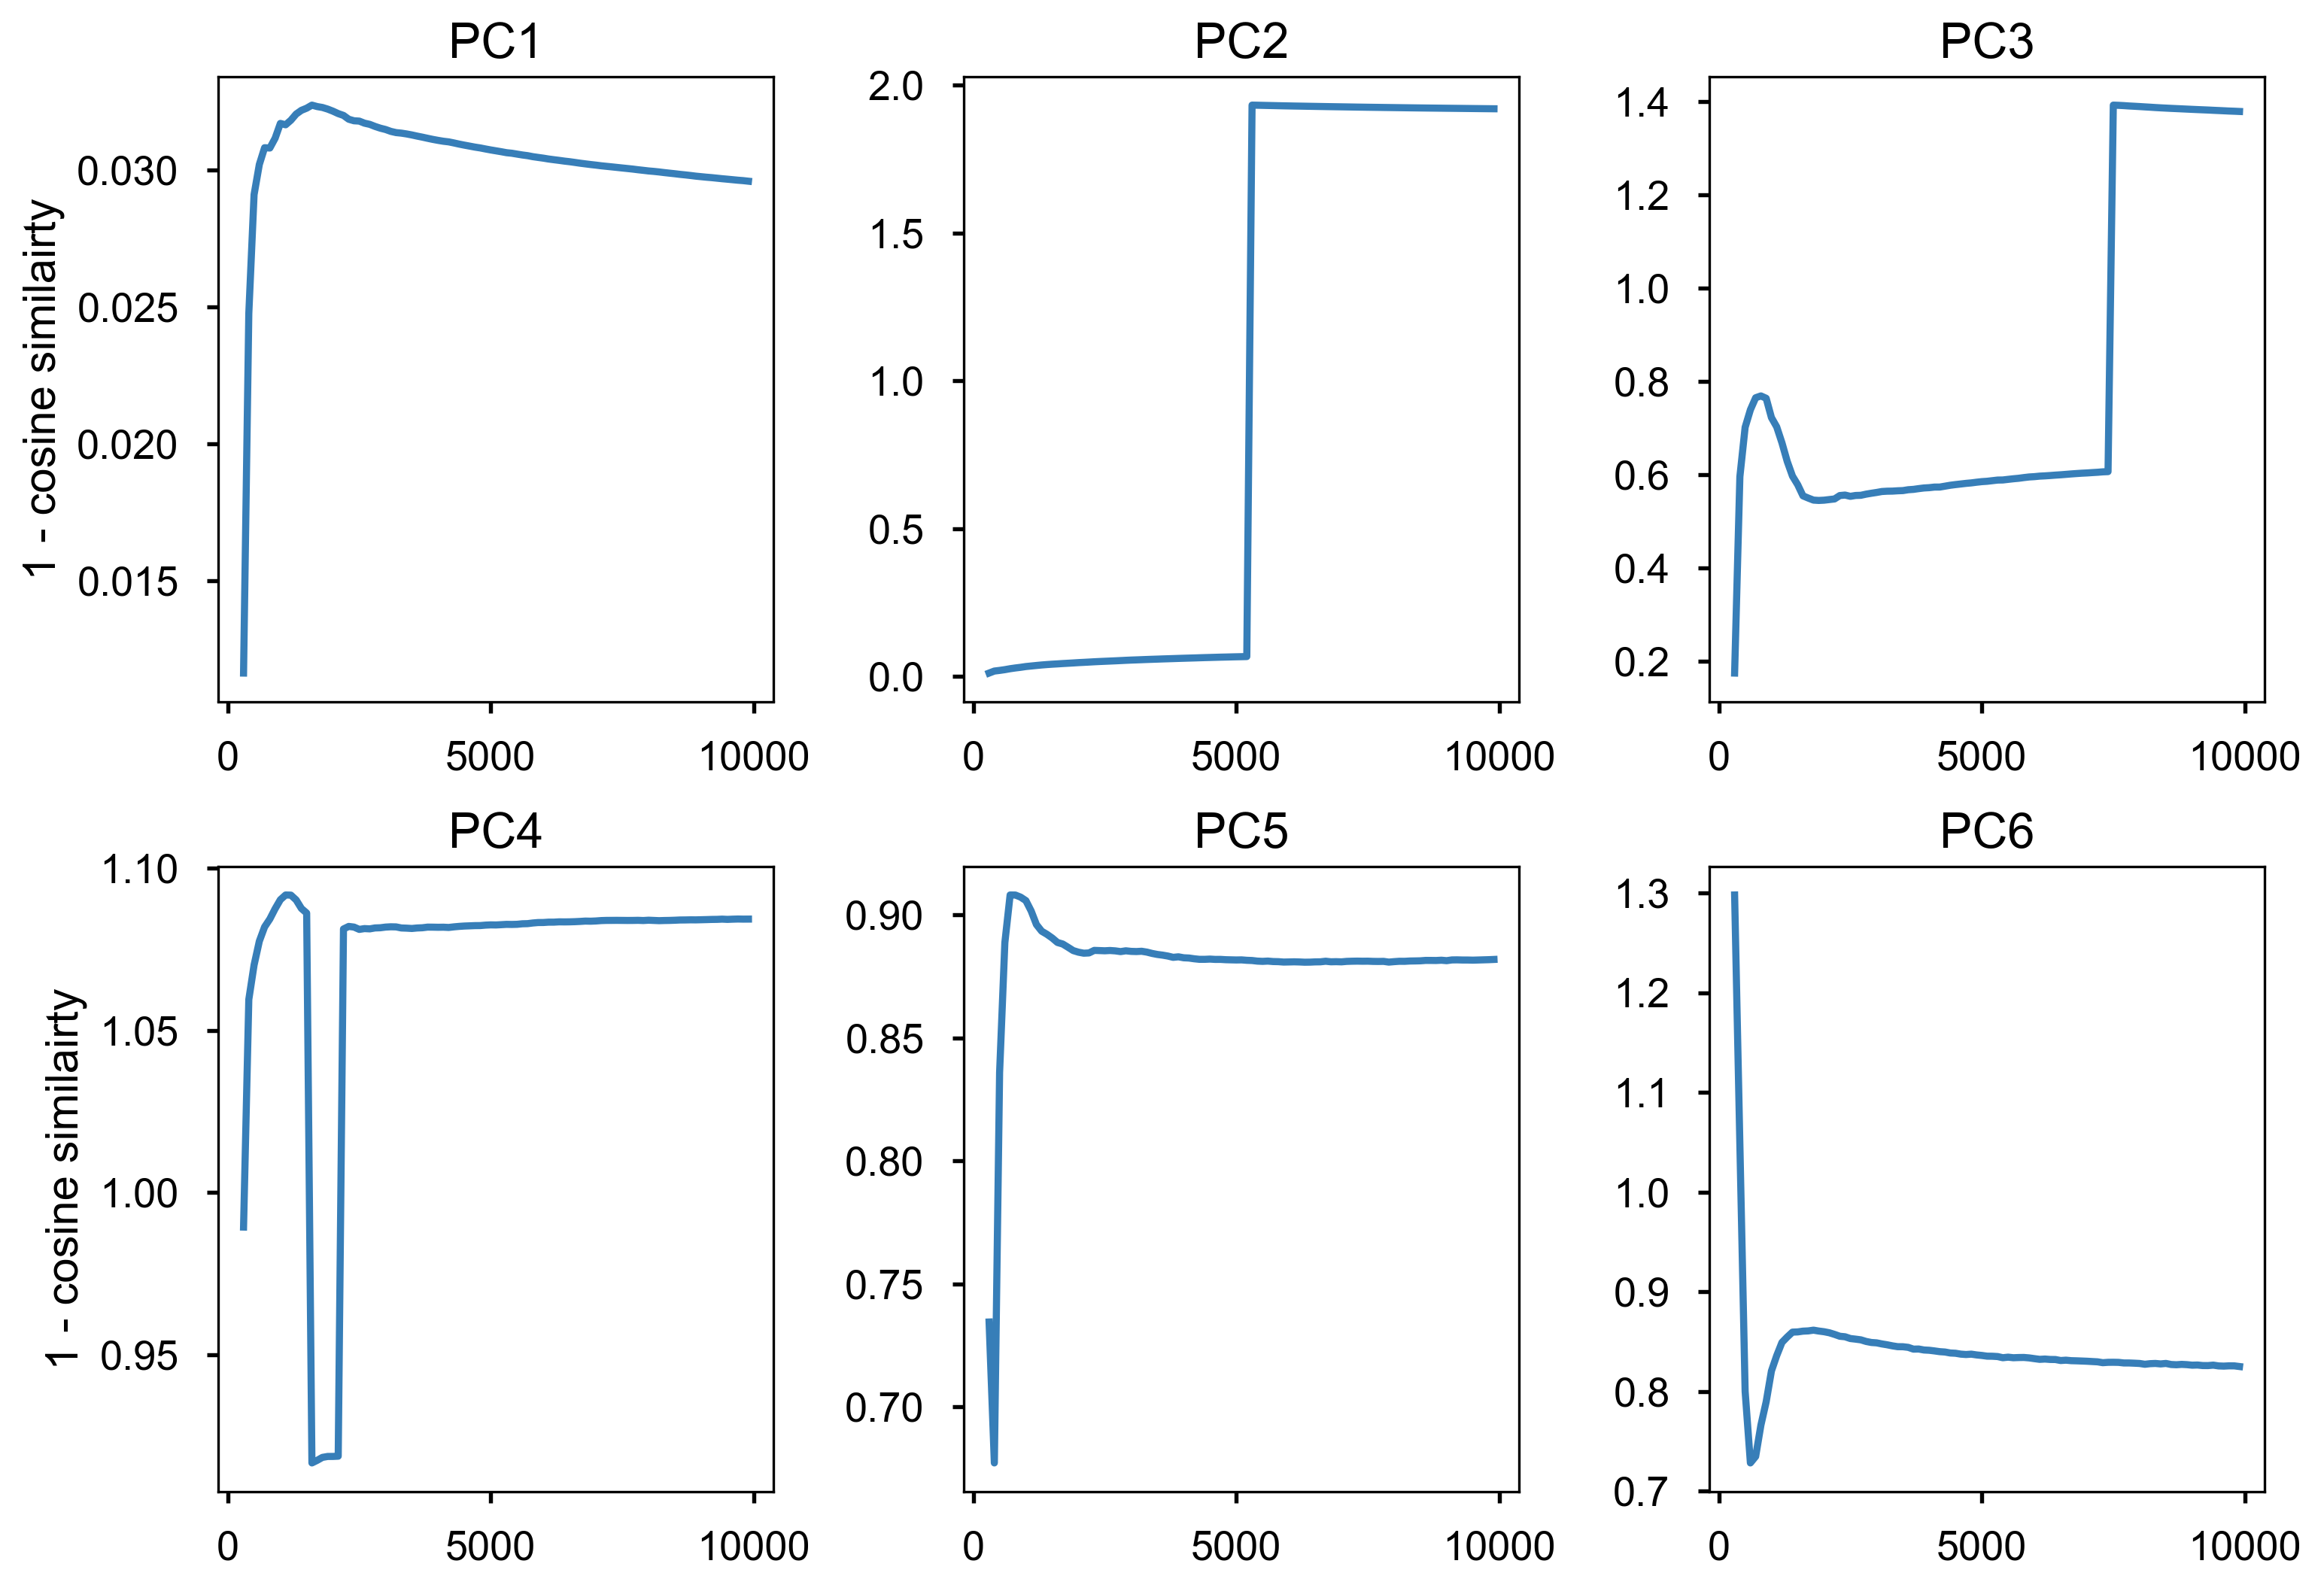

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=False)

ax1.plot(_dat[:, 0], _dat[:, 1])
ax1.set_title('PC1')
ax1.set_ylabel('1 - cosine similairty')

ax2.plot(_dat[:, 0], _dat[:, 2])
ax2.set_title('PC2')

ax3.plot(_dat[:, 0], _dat[:, 3])
ax3.set_title('PC3')

ax4.plot(_dat[:, 0], _dat[:, 4])
ax4.set_title('PC4')
ax4.set_ylabel('1 - cosine similairty')

ax5.plot(_dat[:, 0], _dat[:, 5])
ax5.set_title('PC5')

ax6.plot(_dat[:, 0], _dat[:, 6])
ax6.set_title('PC6')
plt.tight_layout()